In [327]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from PIL import Image 
import random
import matplotlib
matplotlib.style.use('ggplot')

from sklearn.metrics import confusion_matrix
import seaborn as sns

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/higgsboson/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [328]:
# !pip install seaborn

In [329]:
train_df = pd.read_csv('Corona_train.csv')
train_df.head()

,ID,Sentiment,CoronaTweet
0,22979,Positive,I see all kinds of academics already whipping ...
1,9880,Negative,@HenrySmithUK can you raise with Boris please ...
2,35761,Negative,It s a confusing odd time for the shopping pub...
3,37968,Positive,Blog Summary: The Impact of COVID-19 on the Ca...
4,19709,Neutral,??????? ??????? ???\r\r\nWaiting in a long Que...


In [330]:
train_df_positive = train_df[train_df['Sentiment'] == 'Positive']
positive_wc = {}

sentences = train_df_positive['CoronaTweet']
total_positive_words = 0


for sentence in sentences:
    words = sentence.split()
    total_positive_words += len(words)
    
    for word in words:
        if word not in positive_wc:
            positive_wc[word] = 0
        positive_wc[word] += 1  

In [331]:
train_df_negative = train_df[train_df['Sentiment'] == 'Negative']
negative_wc = {}

sentences = train_df_negative['CoronaTweet']
total_negative_words = 0

for sentence in sentences:
    words = sentence.split()
    total_negative_words += len(words)
    for word in words:
        if word not in negative_wc:
            negative_wc[word] = 0
        negative_wc[word] += 1  

In [332]:
train_df_neutral = train_df[train_df['Sentiment'] == 'Neutral']
neutral_wc = {}

sentences = train_df_neutral['CoronaTweet']

total_neutral_words = 0

for sentence in sentences:
    words = sentence.split()
    total_neutral_words += len(words)    
    for word in words:
        if word not in neutral_wc:
            neutral_wc[word] = 0
        neutral_wc[word] += 1  

In [333]:
positive_prob = {}

for word, count in positive_wc.items():
    positive_prob[word] = np.log((count + 1)) - np.log(total_positive_words + len(positive_wc))
    
negative_prob = {}

for word, count in negative_wc.items():
    negative_prob[word] = np.log((count + 1)) - np.log(total_negative_words + len(negative_wc))
    
neutral_prob = {}

for word, count in neutral_wc.items():
    neutral_prob[word] = np.log((count + 1)) - np.log(total_neutral_words + len(neutral_wc))
    
# Prior Probabilities, for them laplace smoothing is not that useful
y_is_positive = np.log(len(train_df_positive)) - np.log(len(train_df))
y_is_negative = np.log(len(train_df_negative)) - np.log(len(train_df))
y_is_neutral = np.log(len(train_df_neutral)) - np.log(len(train_df))

In [334]:
# positive_prob
neutral_prob

{'???????': -8.467477599170305,
 '???': -7.299872439015243,
 'Waiting': -9.497097016351463,
 'in': -4.401712160501505,
 'a': -4.520823149772518,
 'long': -7.810698062781234,
 'Queue': -10.595709305019573,
 'to': -3.8528286692276694,
 'enter': -8.541585571324028,
 'into': -7.069348780403411,
 'supermarket,': -8.621628278997562,
 'and': -4.358166235314885,
 'finally': -9.497097016351463,
 'you': -5.481314776632464,
 'saw': -8.64979915596426,
 'the': -3.6479643778212765,
 'entrance.': -11.512000036893728,
 '#SriLanka': -10.595709305019573,
 '#LKA': -11.512000036893728,
 '#CoronavirusOutbreak': -7.683358640404633,
 '#Coronavirus': -6.155413762221715,
 '#COVID19': -5.726637575245104,
 '#Tamil': -11.512000036893728,
 '#Tamilnadu': -11.512000036893728,
 '#India': -9.902562124459628,
 '#?????': -10.818852856333782,
 'https://t.co/smmxYYI3Vp': -11.512000036893728,
 '#Nuneaton': -11.512000036893728,
 'mum': -10.413387748225619,
 'hits': -9.720240567665673,
 'out': -6.089255091970639,
 'at': -5.2

In [335]:
validate_df = pd.read_csv('Corona_validation.csv')
validate_df.head()

,ID,Sentiment,CoronaTweet
0,7184,Negative,I reflected on my own consumer behaviour last ...
1,36363,Negative,I know everyone is getting stir crazy but befo...
2,10423,Negative,I haven t seen gas prices this low since I fir...
3,6409,Neutral,Only batmeat left on the supermarket shelves\r...
4,7015,Neutral,"Along with health workers, we need to apprecia..."


In [336]:
predictions = []
actual = []
for id, row in validate_df.iterrows():
    
    words = row['CoronaTweet'].split()
    # words = np.unique(words)
    
    positive_sum = y_is_positive
    negative_sum = y_is_negative
    neutral_sum = y_is_neutral
    
    for word in words:
        # 0.5 due to laplace smoothing
        positive_sum += positive_prob.get(word, -np.log(len(positive_wc)))
        negative_sum += negative_prob.get(word, -np.log(len(negative_wc)))
        neutral_sum += neutral_prob.get(word, -np.log(len(neutral_wc)))
    
    if positive_sum >= negative_sum and positive_sum >= neutral_sum:
        predictions.append('Positive')
    elif neutral_sum >= positive_sum and neutral_sum >= negative_sum:
        predictions.append('Neutral')   
    elif negative_sum >= positive_sum and negative_sum >= neutral_sum:
        predictions.append('Negative')
     
    
    actual.append(row['Sentiment'])
    
    print(actual[-1], predictions[-1], positive_sum, negative_sum, neutral_sum, row['CoronaTweet'])


Negative Negative -407.62723346167525 -405.8019221831777 -413.3444515730792 I reflected on my own consumer behaviour last week and made this list
I confess - as much as I feel bad for people who may lose jobs due to the COVID-19, part of me also wish that unethical businesses will no longer be able to operate "as usual" unless making changes #time4change https://t.co/63lXRFi82N
Negative Negative -206.8883167074944 -204.95852420306545 -205.2912138940648 I know everyone is getting stir crazy but before you go out watch this video of how single cough spreads coronavirus across a supermarket #StayHomeSaveLives #Philly  https://t.co/kJf8gjc7Cv
Negative Negative -378.02864034996577 -371.4597602384323 -378.0677766518224 I haven t seen gas prices this low since I first started driving in the late 1980 s The owner tells me he just reduced prices this morning with a glut of supply now that people aren t driving He s has to lay off 2 mechanics and 2 attendants
Neutral Negative -68.81153971299891 

In [337]:
# len(actual), len(predictions)


In [338]:
corrrect = 0
for ac, pred in zip(actual, predictions):
    if ac == pred:
        corrrect += 1
        
print(corrrect / len(actual))

0.5362890980868509


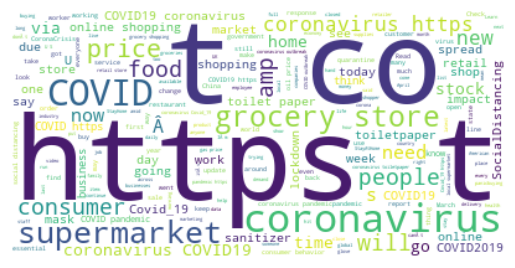

In [339]:
stopwords = set(STOPWORDS)

neutral_cloud = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

entire_text = ' '.join(train_df_neutral['CoronaTweet'].tolist())

neutral_cloud.generate(entire_text)

plt.imshow(neutral_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

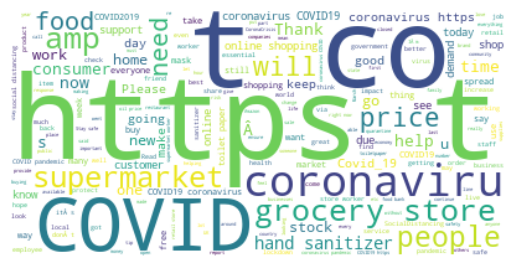

In [340]:
stopwords = set(STOPWORDS)

positive_cloud = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

entire_text = ' '.join(train_df_positive['CoronaTweet'].tolist())

positive_cloud.generate(entire_text)

plt.imshow(positive_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

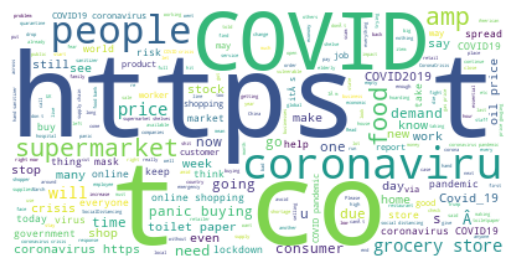

In [341]:
stopwords = set(STOPWORDS)

negative_cloud = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

entire_text = ' '.join(train_df_negative['CoronaTweet'].tolist())

negative_cloud.generate(entire_text)

plt.imshow(negative_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Part b:

In [342]:
options = ["Neutral", "Positive","Negative"]
random_prediction = [random.choice(options) for _ in range(len(actual))]
corrrect = 0
for ac, pred in zip(actual, random_prediction):
    if ac == pred:
        corrrect += 1
        
print(corrrect / len(actual))

0.33404190707561493


In [343]:
all_positive = ["Positive" for _ in range(len(actual))]
corrrect = 0
for ac, pred in zip(actual, all_positive):
    if ac == pred:
        corrrect += 1
        
print(corrrect / len(actual))

0.4385059216519891


Part c


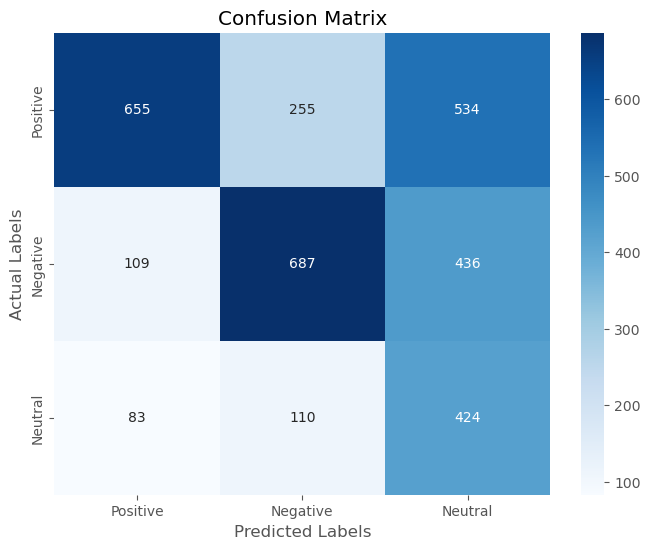

In [344]:
confusion_mat = confusion_matrix(actual, predictions, labels=['Positive', 'Negative', 'Neutral'])

# Display the confusion matrix using seaborn for better visualization
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Positive', 'Negative', 'Neutral'], yticklabels=['Positive', 'Negative', 'Neutral'])
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()

In [345]:
train_df_positive = train_df[train_df['Sentiment'] == 'Positive']
positive_wc = {}

total_positive_words = 0

sentences = train_df_positive['CoronaTweet']

for sentence in sentences:
    words = sentence.split()
    # words = np.unique(words)
    
    filtered_words = [word for word in words if word not in stopwords]
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in filtered_words]
    
    total_positive_words += len(words)
    
    for word in words:
        if word not in positive_wc:
            positive_wc[word] = 0
        positive_wc[word] += 1  

In [346]:
train_df_negative = train_df[train_df['Sentiment'] == 'Negative']
negative_wc = {}

sentences = train_df_negative['CoronaTweet']
total_negative_words = 0

for sentence in sentences:
    words = sentence.split()
    
    filtered_words = [word for word in words if word not in stopwords]
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in filtered_words]
    total_negative_words += len(words)
    
    
    for word in words:
        if word not in negative_wc:
            negative_wc[word] = 0
        negative_wc[word] += 1  

In [347]:
train_df_neutral = train_df[train_df['Sentiment'] == 'Neutral']
neutral_wc = {}

sentences = train_df_neutral['CoronaTweet']
total_neutral_words = 0


for sentence in sentences:
    words = sentence.split()
    
    filtered_words = [word for word in words if word not in stopwords]
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in filtered_words]
    total_neutral_words += len(words)
    
    
    for word in words:
        if word not in neutral_wc:
            neutral_wc[word] = 0
        neutral_wc[word] += 1  

In [348]:
positive_prob = {}

for word, count in positive_wc.items():
    positive_prob[word] = np.log((count + 1)) - np.log(total_positive_words + 2)
    
negative_prob = {}

for word, count in negative_wc.items():
    negative_prob[word] = np.log((count + 1)) - np.log(total_negative_words + 2)
    
neutral_prob = {}

for word, count in neutral_wc.items():
    neutral_prob[word] = np.log((count + 1)) - np.log(total_neutral_words + 2)  
    
# Prior Probabilities, for them laplace smoothing is not that useful
y_is_positive = np.log(len(train_df_positive) / len(train_df))
y_is_negative = np.log(len(train_df_negative) / len(train_df))
y_is_neutral = np.log(len(train_df_neutral) / len(train_df))

In [349]:
predictions = []
actual = []
for id, row in validate_df.iterrows():
    
    words = row['CoronaTweet'].split()
    
    filtered_words = [word for word in words if word not in stopwords]
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in filtered_words]
    
    positive_sum = y_is_positive
    negative_sum = y_is_negative
    neutral_sum = y_is_neutral
    
    for word in words:
        positive_sum += positive_prob.get(word, np.log(0.5))
        negative_sum += negative_prob.get(word, np.log(0.5))
        neutral_sum += neutral_prob.get(word, np.log(0.5))
    
    if positive_sum >= negative_sum and positive_sum >= neutral_sum:
        predictions.append('Positive')
    elif negative_sum >= positive_sum and negative_sum >= neutral_sum:
        predictions.append('Negative')
    elif neutral_sum >= positive_sum and neutral_sum >= negative_sum:
        predictions.append('Neutral')    
    
    actual.append(row['Sentiment'])


In [350]:
corrrect = 0
for ac, pred in zip(actual, predictions):
    if ac == pred:
        corrrect += 1
        
print(corrrect / len(actual))

0.33768600060734894


In [351]:
train_df_positive = train_df[train_df['Sentiment'] == 'Positive']
positive_wc = {}

sentences = train_df_positive['CoronaTweet']

for sentence in sentences:
    words = sentence.split()
    
    filtered_words = [word for word in words if word not in stopwords]
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in filtered_words]
    
    if len(words) > 1:
        for i in range(len(words) - 1):
            bigram = stemmer.stem(words[i]) + '  ' +stemmer.stem(words[i+1])
            if bigram not in positive_wc:
                positive_wc[bigram] = 0
            positive_wc[bigram] += 1  
                
                
    for word in words:
        if word not in positive_wc:
            positive_wc[word] = 0
        positive_wc[word] += 1  

In [352]:
train_df_negative = train_df[train_df['Sentiment'] == 'Negative']
negative_wc = {}

sentences = train_df_negative['CoronaTweet']

for sentence in sentences:
    words = sentence.split()
    
    filtered_words = [word for word in words if word not in stopwords]
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in filtered_words]
    
    if len(words) > 1:
        for i in range(len(words) - 1):
            bigram = stemmer.stem(words[i]) + '  ' +stemmer.stem( words[i+1])
            if bigram not in negative_wc:
                negative_wc[bigram] = 0
            negative_wc[bigram] += 1  

    for word in words:
        if word not in negative_wc:
            negative_wc[word] = 0
        negative_wc[word] += 1  

In [353]:
train_df_neutral = train_df[train_df['Sentiment'] == 'Neutral']
neutral_wc = {}

sentences = train_df_neutral['CoronaTweet']

for sentence in sentences:
    words = sentence.split()
    words = np.unique(words)
    
    filtered_words = [word for word in words if word not in stopwords]
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in filtered_words]
    
    
    if len(words) > 1:
        for i in range(len(words) - 1):
            bigram = stemmer.stem(words[i]) + '  ' +stemmer.stem(words[i+1])
            if bigram not in neutral_wc:
                neutral_wc[bigram] = 0
            neutral_wc[bigram] += 1  
    
    for word in words:
        if word not in neutral_wc:
            neutral_wc[word] = 0
        neutral_wc[word] += 1  

In [354]:
total_positive_words = 0
for word, count in positive_wc.items():
    total_positive_words += count
    
total_negative_words = 0
for word, count in negative_wc.items():
    total_negative_words += count
    
total_neutral_words = 0
for word, count in neutral_wc.items():
    total_neutral_words += count

In [355]:
positive_prob = {}

for word, count in positive_wc.items():
    positive_prob[word] = np.log((count + 1)) - np.log(total_positive_words + 2)
    
negative_prob = {}

for word, count in negative_wc.items():
    negative_prob[word] = np.log((count + 1)) - np.log(total_negative_words + 2)
    
neutral_prob = {}

for word, count in neutral_wc.items():
    neutral_prob[word] = np.log((count + 1)) - np.log(total_neutral_words + 2)
    
# Prior Probabilities, for them laplace smoothing is not that useful
y_is_positive = np.log(len(train_df_positive) / len(train_df))
y_is_negative = np.log(len(train_df_negative) / len(train_df))
y_is_neutral = np.log(len(train_df_neutral) / len(train_df))

In [356]:
predictions = []
actual = []

for id, row in validate_df.iterrows():
    words = row['CoronaTweet'].split()
    
    filtered_words = [word for word in words if word not in stopwords]

    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in filtered_words]
    

    positive_sum = y_is_positive
    negative_sum = y_is_negative
    neutral_sum = y_is_neutral
    
    if len(words) > 1:
        for i in range(len(words) - 1):
                bigram = stemmer.stem(words[i]) + '  ' +stemmer.stem(words[i+1])
                positive_sum += positive_prob.get(bigram, np.log(0.5))
                negative_sum += negative_prob.get(bigram, np.log(0.5))
                neutral_sum += neutral_prob.get(bigram, np.log(0.5))
    
    for word in words:
        # 0.5 due to laplace smoothing
        positive_sum += positive_prob.get(word, np.log(0.5))
        negative_sum += negative_prob.get(word, np.log(0.5))
        neutral_sum += neutral_prob.get(word, np.log(0.5))
    
    if positive_sum >= negative_sum and positive_sum >= neutral_sum:
        predictions.append('Positive')
    elif negative_sum >= positive_sum and negative_sum >= neutral_sum:
        predictions.append('Negative')
    elif neutral_sum >= positive_sum and neutral_sum >= negative_sum:
        predictions.append('Neutral')    
    
    actual.append(row['Sentiment'])


In [357]:
corrrect = 0
for ac, pred in zip(actual, predictions):
    if ac == pred:
        corrrect += 1
        
print(corrrect / len(actual))

0.17673853628909808
